## About the project

### Scope

On the occasion of local and regional elections in Greece on 26 May 2019, we decided to zoom-in on the Web and Social Media publicity for candidates taking part in the mayoral race in Athens and in regional race in Attica. We aimed at analyzing and presenting their digital footprint in terms of share of voice, sentiment analysis, news coverage and user-generated content.

### Study ID & Credits

This project is owned by Palo Services (http://www.paloservices.com/). Data mining was done by programmers and with the use of PaloPro platform for Web Monitoring and Social Media Listening, data scientists  were responsible for machine and deep learning models developed for sentiment analysis purposes and I was responsible for the outline, implementation and presentation of the analysis: I analyzed data and I made the relevant data visualizations on behalf of the company, by using code displayed below. The deliverable was a data-driven article that is published in Greek on the corporate blog and it is online available here: https://palopro.io/topic-analysis/ekloges2019-dimotikes-periferiakes-attikis-web-social-analysis/, along with full Analysis ID. 

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib.ticker import FuncFormatter

In [3]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [4]:
%matplotlib inline

In [5]:
plt.rcParams['pdf.fonttype'] = 42

In [6]:
df1 = pd.read_excel('δήμαρχοι 2.xlsx',sheet_name='Sheet')

In [7]:
df1.head(0)

,channel,item_type,id,createdAt,impact,info,text,snippet,url,manual_sentiment,predicted_sentiment,sentiment,query


In [8]:
df1.groupby('query').info.value_counts().sum()

26101

In [9]:
df1['info'].describe()

count             26101
unique             7075
top       @InsdataInter
freq                169
Name: info, dtype: object

In [10]:
df1['info'].value_counts().sum()

26101

## Unique / query

In [11]:
df1.groupby('query').info.describe()

,count,unique,top,freq
query,,,,
Βασίλης Καπερνάρος,382,228,@annika1021,40
Γιώργος Βουλγαράκης,1102,655,http://www.iapopsi.gr,25
Γιώργος Καραμπελιάς,528,267,http://ardin-rixi.gr,41
Ηλίας Κασιδιάρης,5139,2192,@1024102410,50
Κώστας Μπακογιάννης,9409,3390,@kanekos69,75
Νάσος Ηλιόπουλος,4955,2268,@InsdataInter,118
Νίκος Σοφιανός,1005,543,http://www.902.gr,41
Πέτρος Κωνσταντίνου,476,371,@StraightSix6,10
Παύλος Γερουλάνος,3105,1397,@v_mary_p,68


In [12]:
df2 = pd.DataFrame(data=df1.groupby('query').info.describe())

In [13]:
df2

,count,unique,top,freq
query,,,,
Βασίλης Καπερνάρος,382,228,@annika1021,40
Γιώργος Βουλγαράκης,1102,655,http://www.iapopsi.gr,25
Γιώργος Καραμπελιάς,528,267,http://ardin-rixi.gr,41
Ηλίας Κασιδιάρης,5139,2192,@1024102410,50
Κώστας Μπακογιάννης,9409,3390,@kanekos69,75
Νάσος Ηλιόπουλος,4955,2268,@InsdataInter,118
Νίκος Σοφιανός,1005,543,http://www.902.gr,41
Πέτρος Κωνσταντίνου,476,371,@StraightSix6,10
Παύλος Γερουλάνος,3105,1397,@v_mary_p,68


In [14]:
df2['count'].sum()

26101

In [15]:
df2['sov'] = df2['count']/df2['count'].sum()*100
df2['sov_unique'] = df2['unique']/df2['unique'].sum()*100
df2 = df2.to_csv('df2.csv')

In [16]:
df2

In [17]:
df2 = pd.read_csv('df2.csv')

In [18]:
df2

,query,count,unique,top,freq,sov,sov_unique
0,Βασίλης Καπερνάρος,382,228,@annika1021,40,1.463545,2.015737
1,Γιώργος Βουλγαράκης,1102,655,http://www.iapopsi.gr,25,4.222060,5.790823
2,Γιώργος Καραμπελιάς,528,267,http://ardin-rixi.gr,41,2.022911,2.360534
3,Ηλίας Κασιδιάρης,5139,2192,@1024102410,50,19.688901,19.379365
4,Κώστας Μπακογιάννης,9409,3390,@kanekos69,75,36.048427,29.970825
5,Νάσος Ηλιόπουλος,4955,2268,@InsdataInter,118,18.983947,20.051278
6,Νίκος Σοφιανός,1005,543,http://www.902.gr,41,3.850427,4.800637
7,Πέτρος Κωνσταντίνου,476,371,@StraightSix6,10,1.823685,3.279993
8,Παύλος Γερουλάνος,3105,1397,@v_mary_p,68,11.896096,12.350809


In [19]:
df2['sov'] = round(df2.sov)
df2['sov_unique'] = round(df2.sov_unique)

# 1. SOV & SOV_unique

In [20]:
df2

,query,count,unique,top,freq,sov,sov_unique
0,Βασίλης Καπερνάρος,382,228,@annika1021,40,1.0,2.0
1,Γιώργος Βουλγαράκης,1102,655,http://www.iapopsi.gr,25,4.0,6.0
2,Γιώργος Καραμπελιάς,528,267,http://ardin-rixi.gr,41,2.0,2.0
3,Ηλίας Κασιδιάρης,5139,2192,@1024102410,50,20.0,19.0
4,Κώστας Μπακογιάννης,9409,3390,@kanekos69,75,36.0,30.0
5,Νάσος Ηλιόπουλος,4955,2268,@InsdataInter,118,19.0,20.0
6,Νίκος Σοφιανός,1005,543,http://www.902.gr,41,4.0,5.0
7,Πέτρος Κωνσταντίνου,476,371,@StraightSix6,10,2.0,3.0
8,Παύλος Γερουλάνος,3105,1397,@v_mary_p,68,12.0,12.0


In [21]:
df2['unique'].sum()

11311

## Unique/query by Channel

In [22]:
df1.groupby(['query','channel']).info.describe()

count freq  \
query               channel                
Βασίλης Καπερνάρος  blogs        23    1   
                    facebook     26    4   
                    news         62    5   
                    twitter     271   40   
                    youtube       0  NaN   
Γιώργος Βουλγαράκης blogs       130    7   
                    facebook    158    3   
                    forums        1    1   
                    instagram     0  NaN   
                    news        388   25   
                    twitter     424   17   
                    youtube       1    1   
Γιώργος Καραμπελιάς blogs       145   41   
                    facebook     32   11   
                    forums        2    2   
                    news         65    4   
                    twitter     284   26   
                    youtube       0  NaN   
Ηλίας Κασιδιάρης    blogs       184    9   
                    facebook    223    6   
                    forums        7    7   
                    instagram     0  NaN   
                    news        391   13   
                    twitter    4330   50   
                    youtube       4    1   
Κώστας Μπακογιάννης blogs       589   35   
                    facebook    898   36   
                    forums        2    2   
                    instagram     0  NaN   
                    news       2363   48   
                    twitter    5551   75   
                    youtube       6    1   
Νάσος Ηλιόπουλος    blogs       306   15   
                    facebook    553   28   
                    instagram     0  NaN   
                    news       1129   38   
                    twitter    2964  118   
                    youtube       3    1   
Νίκος Σοφιανός      blogs        78    4   
                    facebook     92    3   
                    news        372   41   
                    twitter     463   21   
                    youtube       0  NaN   
Πέτρος Κωνσταντίνου blogs        83    6   
                    facebook     10    2   
                    news        124    4   
                    twitter     258   10   
                    youtube       1    1   
Παύλος Γερουλάνος   blogs       180   15   
                    facebook    309   19   
                    instagram     0  NaN   
                    news        771   35   
                    twitter    1845   68   
                    youtube       0  NaN   

                                                                  top unique  
query               channel                                                   
Βασίλης Καπερνάρος  blogs             http://paradosiakos.blogspot.gr     23  
                    facebook                          730280920389528     17  
                    news                         http://www.enikos.gr     48  
                    twitter                               @annika1021    140  
                    youtube                                       NaN      0  
Γιώργος Βουλγαράκης blogs                  http://www.aftodioikisi.gr     69  
                    facebook                          765649423511175    144  
                    forums     https://www.adslgr.com/forum/forum.php      1  
                    instagram                                     NaN      0  
                    news                        http://www.iapopsi.gr    189  
                    twitter                            @diotiskostas1    252  
                    youtube                               JP Lastname      1  
Γιώργος Καραμπελιάς blogs                        http://ardin-rixi.gr     56  
                    facebook                          138450232905994     20  
                    forums             https://www.4troxoi.gr/phpBB3/      1  
                    news                         http://www.zougla.gr     45  
                    twitter                                @blue_sevi    147  
                    youtube                                     

In [23]:
df1.groupby('query').sentiment.value_counts(normalize=True)*100

query                sentiment
Βασίλης Καπερνάρος   neutral      73.697917
                     negative     23.177083
                     positive      3.125000
Γιώργος Βουλγαράκης  neutral      84.629133
                     negative     13.851653
                     positive      1.519214
Γιώργος Καραμπελιάς  neutral      84.082397
                     negative     13.295880
                     positive      2.621723
Ηλίας Κασιδιάρης     neutral      64.106553
                     negative     34.318491
                     positive      1.574956
Κώστας Μπακογιάννης  neutral      77.550588
                     negative     19.196949
                     positive      3.231274
                     ignore        0.021189
Νάσος Ηλιόπουλος     neutral      80.649038
                     negative     17.147436
                     positive      2.163462
                     ignore        0.040064
Νίκος Σοφιανός       neutral      90.466733
                     negative      9.136048
 

In [24]:
df3 = pd.DataFrame(data=df1.groupby('query').sentiment.value_counts(normalize=True)*100)

In [25]:
df3

sentiment
query               sentiment           
Βασίλης Καπερνάρος  neutral    73.697917
                    negative   23.177083
                    positive    3.125000
Γιώργος Βουλγαράκης neutral    84.629133
                    negative   13.851653
                    positive    1.519214
Γιώργος Καραμπελιάς neutral    84.082397
                    negative   13.295880
                    positive    2.621723
Ηλίας Κασιδιάρης    neutral    64.106553
                    negative   34.318491
                    positive    1.574956
Κώστας Μπακογιάννης neutral    77.550588
                    negative   19.196949
                    positive    3.231274
                    ignore      0.021189
Νάσος Ηλιόπουλος    neutral    80.649038
                    negative   17.147436
                    positive    2.163462
                    ignore      0.040064
Νίκος Σοφιανός      neutral    90.466733
                    negative    9.136048
                    positive    0.397219
Πέτρος Κωνσταντίνου neutral    84.133612
                    negative   15.240084
                    positive    0.626305
Παύλος Γερουλάνος   neutral    74.266582
                    negative   23.405612
                    positive    2.295918
                    ignore      0.031888

In [26]:
df3.to_csv('df3.csv')

In [27]:
df3 = pd.read_csv('df3.csv')

In [28]:
df3

,query,sentiment,sentiment.1
0,Βασίλης Καπερνάρος,neutral,73.697917
1,Βασίλης Καπερνάρος,negative,23.177083
2,Βασίλης Καπερνάρος,positive,3.125000
3,Γιώργος Βουλγαράκης,neutral,84.629133
4,Γιώργος Βουλγαράκης,negative,13.851653
5,Γιώργος Βουλγαράκης,positive,1.519214
6,Γιώργος Καραμπελιάς,neutral,84.082397
7,Γιώργος Καραμπελιάς,negative,13.295880
8,Γιώργος Καραμπελιάς,positive,2.621723
9,Ηλίας Κασιδιάρης,neutral,64.106553


In [29]:
df3 = df3.rename(columns={"sentiment.1":"pct"}) 

In [30]:
df4 = pd.DataFrame(data=df3.groupby(['query','sentiment']).pct.mean())

In [31]:
df4

pct
query               sentiment           
Βασίλης Καπερνάρος  negative   23.177083
                    neutral    73.697917
                    positive    3.125000
Γιώργος Βουλγαράκης negative   13.851653
                    neutral    84.629133
                    positive    1.519214
Γιώργος Καραμπελιάς negative   13.295880
                    neutral    84.082397
                    positive    2.621723
Ηλίας Κασιδιάρης    negative   34.318491
                    neutral    64.106553
                    positive    1.574956
Κώστας Μπακογιάννης ignore      0.021189
                    negative   19.196949
                    neutral    77.550588
                    positive    3.231274
Νάσος Ηλιόπουλος    ignore      0.040064
                    negative   17.147436
                    neutral    80.649038
                    positive    2.163462
Νίκος Σοφιανός      negative    9.136048
                    neutral    90.466733
                    positive    0.397219
Πέτρος Κωνσταντίνου negative   15.240084
                    neutral    84.133612
                    positive    0.626305
Παύλος Γερουλάνος   ignore      0.031888
                    negative   23.405612
                    neutral    74.266582
                    positive    2.295918

In [32]:
df4 = df4.unstack()
df4

pct                                
sentiment              ignore   negative    neutral  positive
query                                                        
Βασίλης Καπερνάρος        NaN  23.177083  73.697917  3.125000
Γιώργος Βουλγαράκης       NaN  13.851653  84.629133  1.519214
Γιώργος Καραμπελιάς       NaN  13.295880  84.082397  2.621723
Ηλίας Κασιδιάρης          NaN  34.318491  64.106553  1.574956
Κώστας Μπακογιάννης  0.021189  19.196949  77.550588  3.231274
Νάσος Ηλιόπουλος     0.040064  17.147436  80.649038  2.163462
Νίκος Σοφιανός            NaN   9.136048  90.466733  0.397219
Πέτρος Κωνσταντίνου       NaN  15.240084  84.133612  0.626305
Παύλος Γερουλάνος    0.031888  23.405612  74.266582  2.295918

In [33]:
df4 = df4['pct'].reset_index()

In [34]:
df4

sentiment,query,ignore,negative,neutral,positive
0,Βασίλης Καπερνάρος,NaN,23.177083,73.697917,3.125000
1,Γιώργος Βουλγαράκης,NaN,13.851653,84.629133,1.519214
2,Γιώργος Καραμπελιάς,NaN,13.295880,84.082397,2.621723
3,Ηλίας Κασιδιάρης,NaN,34.318491,64.106553,1.574956
4,Κώστας Μπακογιάννης,0.021189,19.196949,77.550588,3.231274
5,Νάσος Ηλιόπουλος,0.040064,17.147436,80.649038,2.163462
6,Νίκος Σοφιανός,NaN,9.136048,90.466733,0.397219
7,Πέτρος Κωνσταντίνου,NaN,15.240084,84.133612,0.626305
8,Παύλος Γερουλάνος,0.031888,23.405612,74.266582,2.295918


In [35]:
df4.dtypes

sentiment
query        object
ignore      float64
negative    float64
neutral     float64
positive    float64
dtype: object

In [36]:
# df5 = df4.to_csv('df5.csv')

In [37]:
# df5 = pd.read_csv('df5.csv')
df4 = df4.drop('ignore',axis=1)
df4


sentiment,query,negative,neutral,positive
0,Βασίλης Καπερνάρος,23.177083,73.697917,3.125000
1,Γιώργος Βουλγαράκης,13.851653,84.629133,1.519214
2,Γιώργος Καραμπελιάς,13.295880,84.082397,2.621723
3,Ηλίας Κασιδιάρης,34.318491,64.106553,1.574956
4,Κώστας Μπακογιάννης,19.196949,77.550588,3.231274
5,Νάσος Ηλιόπουλος,17.147436,80.649038,2.163462
6,Νίκος Σοφιανός,9.136048,90.466733,0.397219
7,Πέτρος Κωνσταντίνου,15.240084,84.133612,0.626305
8,Παύλος Γερουλάνος,23.405612,74.266582,2.295918


## Choose negative and work on unique negative referrers

In [38]:
negative = df1[df1.sentiment.str.contains("negative", case=False, na=False)]

In [40]:
negative.head(0)

,channel,item_type,id,createdAt,impact,info,text,snippet,url,manual_sentiment,predicted_sentiment,sentiment,query


In [41]:
negative.groupby(['query','channel']).info.describe()

count freq                                 top  \
query               channel                                                   
Βασίλης Καπερνάρος  blogs        2    1       http://serresbomb.blogspot.gr   
                    facebook     4    1  1454236241524042 - User: 525388158   
                    news         1    1                  http://www.star.gr   
                    twitter     82   15                         @annika1021   
Γιώργος Βουλγαράκης blogs       15    3          http://www.aftodioikisi.gr   
                    facebook    33    2                     765649423511175   
                    news         3    1                   http://e-istos.gr   
                    twitter    103    3                      @Marka20963539   
                    youtube      0  NaN                                 NaN   
Γιώργος Καραμπελιάς blogs       18    3     http://geromorias.blogspot.gr\n   
                    facebook     5    1  1099426996744917 - User: 799596979   
                    news         3    1    http://www.analystsforchange.org   
                    twitter     45    5                          @kanekos69   
Ηλίας Κασιδιάρης    blogs       49    3                 http://www.bloko.gr   
                    facebook    78    3                     201591320048579   
                    news        29    4               http://www.kar.org.gr   
                    twitter   1609   23                             @XAscum   
Κώστας Μπακογιάννης blogs      145   10          http://www.aftodioikisi.gr   
                    facebook   128    3                     192906947432657   
                    news       110    3             http://www.neashmera.gr   
                    twitter   1428   24                          @kanekos69   
                    youtube      0  NaN                                 NaN   
Νάσος Ηλιόπουλος    blogs       53    4     http://nonews-news.blogspot.com   
                    facebook    59    2                     189454117844033   
                    news        23    2                    http://www.in.gr   
                    twitter    720    9                       @InsdataInter   
                    youtube      0  NaN                                 NaN   
Νίκος Σοφιανός      blogs       15    1     http://nonews-news.blogspot.com   
                    facebook     7    1       76937961900 - User: 254822088   
                    news         3    1              http://news24world.com   
                    twitter     67    4                        @MarkissiosK   
Πέτρος Κωνσταντίνου blogs       13    1      http://attikanea.blogspot.com/   
                    facebook     1    1   352050718234330 - User: 833485988   
                    news         8    2            http://www.newsnowgr.com   
                    twitter     51    4                        @lena_pefani   
Παύλος Γερουλάνος   blogs       43    4              http://cosmopoliti.com   
                    facebook   138    8                     196882087005924   
                    news        25    2                  http://www.skai.gr   
                    twitter    527   14                           @v_mary_p   

                             unique  
query               channel          
Βασίλης Καπερνάρος  blogs         2  
                    facebook      4  
                    news          1  
                    twitter      53  
Γιώργος Βουλγαράκης blogs        11  
                    facebook     32  
                    news          3  
                    twitter      94  
                    youtube       0  
Γιώργος Καραμπελιάς blogs        13  
                    facebook      5  
                    news          3  
                    twitter      37  
Ηλίας Κασιδιάρης    blogs        41  
                    facebook     74  
                    news         20  
                    twitter     916  
Κώστας Μπακογιάννης blogs        81  
                    facebook 

In [42]:
negative.groupby(['query']).info.describe()

,count,unique,top,freq
query,,,,
Βασίλης Καπερνάρος,89,60,@annika1021,15
Γιώργος Βουλγαράκης,154,140,@Marka20963539,3
Γιώργος Καραμπελιάς,71,57,@kanekos69,5
Ηλίας Κασιδιάρης,1765,1051,@XAscum,23
Κώστας Μπακογιάννης,1811,1164,@kanekos69,24
Νάσος Ηλιόπουλος,855,663,@InsdataInter,9
Νίκος Σοφιανός,92,73,@MarkissiosK,4
Πέτρος Κωνσταντίνου,73,66,@lena_pefani,4
Παύλος Γερουλάνος,733,539,@v_mary_p,14


In [43]:
df_negative = pd.DataFrame(data=negative.groupby('query').info.describe())

In [44]:
df_negative

,count,unique,top,freq
query,,,,
Βασίλης Καπερνάρος,89,60,@annika1021,15
Γιώργος Βουλγαράκης,154,140,@Marka20963539,3
Γιώργος Καραμπελιάς,71,57,@kanekos69,5
Ηλίας Κασιδιάρης,1765,1051,@XAscum,23
Κώστας Μπακογιάννης,1811,1164,@kanekos69,24
Νάσος Ηλιόπουλος,855,663,@InsdataInter,9
Νίκος Σοφιανός,92,73,@MarkissiosK,4
Πέτρος Κωνσταντίνου,73,66,@lena_pefani,4
Παύλος Γερουλάνος,733,539,@v_mary_p,14


In [45]:
df_negative.dtypes

count     object
unique    object
top       object
freq      object
dtype: object

In [46]:
df_negative['count'] =df_negative['count'].astype(int)

In [47]:
df_negative['unique'] =df_negative['unique'].astype(int)

In [48]:
df_negative['freq'] =df_negative['freq'].astype(int)

In [49]:
df_negative.dtypes

count      int32
unique     int32
top       object
freq       int32
dtype: object

In [50]:
df_negative['count'].sum()

5643

In [51]:
df_negative.to_csv('negative_unique.csv')

In [52]:
negative_unique = pd.read_csv('negative_unique.csv')

In [53]:
negative_unique

,query,count,unique,top,freq
0,Βασίλης Καπερνάρος,89,60,@annika1021,15
1,Γιώργος Βουλγαράκης,154,140,@Marka20963539,3
2,Γιώργος Καραμπελιάς,71,57,@kanekos69,5
3,Ηλίας Κασιδιάρης,1765,1051,@XAscum,23
4,Κώστας Μπακογιάννης,1811,1164,@kanekos69,24
5,Νάσος Ηλιόπουλος,855,663,@InsdataInter,9
6,Νίκος Σοφιανός,92,73,@MarkissiosK,4
7,Πέτρος Κωνσταντίνου,73,66,@lena_pefani,4
8,Παύλος Γερουλάνος,733,539,@v_mary_p,14


In [54]:
negative_unique.dtypes

query     object
count      int64
unique     int64
top       object
freq       int64
dtype: object

In [55]:
negative_unique = negative_unique.replace({
    'Κώστας Μπακογιάννης': 10, 
    'Νάσος Ηλιόπουλος': 30,
    'Ηλίας Κασιδιάρης':20,
    'Παύλος Γερουλάνος':40,
    'Γιώργος Βουλγαράκης':50,
    'Νίκος Σοφιανός':60,
    'Πέτρος Κωνσταντίνου':80,
    'Γιώργος Καραμπελιάς':70,
    'Βασίλης Καπερνάρος':90   
})

In [56]:
negative_unique['query']=negative_unique['query'].astype(int)

In [57]:
negative_unique['mean_productivity'] = negative_unique['count']/negative_unique['unique']

In [58]:
negative_unique

,query,count,unique,top,freq,mean_productivity
0,90,89,60,@annika1021,15,1.483333
1,50,154,140,@Marka20963539,3,1.100000
2,70,71,57,@kanekos69,5,1.245614
3,20,1765,1051,@XAscum,23,1.679353
4,10,1811,1164,@kanekos69,24,1.555842
5,30,855,663,@InsdataInter,9,1.289593
6,60,92,73,@MarkissiosK,4,1.260274
7,80,73,66,@lena_pefani,4,1.106061
8,40,733,539,@v_mary_p,14,1.359926


In [59]:
negative_unique['count'].sum()

5643

In [61]:
df4.dtypes

sentiment
query        object
negative    float64
neutral     float64
positive    float64
dtype: object

In [62]:
df4 = df4.replace({
    'Κώστας Μπακογιάννης': 10, 
    'Νάσος Ηλιόπουλος': 30,
    'Ηλίας Κασιδιάρης':20,
    'Παύλος Γερουλάνος':40,
    'Γιώργος Βουλγαράκης':50,
    'Νίκος Σοφιανός':60,
    'Πέτρος Κωνσταντίνου':80,
    'Γιώργος Καραμπελιάς':70,
    'Βασίλης Καπερνάρος':90   
})

In [63]:
df4.dtypes

sentiment
query         int64
negative    float64
neutral     float64
positive    float64
dtype: object

In [64]:
df = pd.merge(negative_unique,df4,on='query')

In [65]:
df

,query,count,unique,top,freq,mean_productivity,negative,neutral,positive
0,90,89,60,@annika1021,15,1.483333,23.177083,73.697917,3.125000
1,50,154,140,@Marka20963539,3,1.100000,13.851653,84.629133,1.519214
2,70,71,57,@kanekos69,5,1.245614,13.295880,84.082397,2.621723
3,20,1765,1051,@XAscum,23,1.679353,34.318491,64.106553,1.574956
4,10,1811,1164,@kanekos69,24,1.555842,19.196949,77.550588,3.231274
5,30,855,663,@InsdataInter,9,1.289593,17.147436,80.649038,2.163462
6,60,92,73,@MarkissiosK,4,1.260274,9.136048,90.466733,0.397219
7,80,73,66,@lena_pefani,4,1.106061,15.240084,84.133612,0.626305
8,40,733,539,@v_mary_p,14,1.359926,23.405612,74.266582,2.295918


## Choose neutral and work on unique neutral referrers

In [66]:
neutral = df1[df1.sentiment.str.contains("neutral", case=False, na=False)]

In [67]:
neutral.head()

,channel,item_type,id,createdAt,impact,info,text,snippet,url,manual_sentiment,predicted_sentiment,sentiment,query
0,news,article,1359_news_news_573fb1c9072d1badaae16cde758f89c0,2019-05-10 02:59:20,0.30,http://www.economy365.gr,"""Μετατρέψατε τη μομφή προς τον Πολάκη σε ψήφο ...",ποιές είναι οι βασικές αρχές της Δημοκρατίας. ...,http://www.economy365.gr/article/120223/mpakog...,NaN,neutral,neutral,Κώστας Μπακογιάννης
1,news,article,1363_news_news_d1922e36448d7f04605c431844dc2cc6,2019-05-10 02:57:16,0.44,http://www.tribune.gr,"""Στην προσπάθεια, για οικονομική και κοινωνική...",εκδήλωση προσήλθαν και απηύθυναν χαιρετισμούς ...,https://www.tribune.gr/greece/news/article/576...,NaN,neutral,neutral,Νάσος Ηλιόπουλος
3,blogs,article,1361_blogs_blog_faaa1896308b7a5afefb82f7d7807924,2019-05-10 02:56:17,0.03,http://korinthiakoi-orizontes.blogspot.gr,Νέος δήμαρχος Αθηναίων με μεγάλη διαφορά από τ...,"Αθηναίων με τον Παύλο <em>Γερουλάνο</em>, διετ...",http://korinthiakoi-orizontes.blogspot.com/201...,NaN,neutral,neutral,Παύλος Γερουλάνος
4,news,article,1363_news_news_297473b0b36614d6e8b608a76cde0595,2019-05-10 02:53:31,0.42,http://parallaximag.gr,Σε 150.000 κατοικίες προς ενοικίαση στην Αττικ...,"ΠΟΜΙΔΑ, στην εκδήλωση προσήλθαν και απηύθυναν ...",https://parallaximag.gr/life/12-000-eginan-air...,NaN,neutral,neutral,Νάσος Ηλιόπουλος
5,news,article,1364_news_news_26f1b6b21b84ca503b94ce7e3f00d62b,2019-05-10 02:51:48,0.42,http://www.902.gr,Το Δημοτικό Βρεφοκομείο Αθήνας επισκέφτηκε σήμ...,Το Δημοτικό Βρεφοκομείο Αθήνας επισκέφτηκε σήμ...,https://www.902.gr/eidisi/ekloges/190413/den-y...,NaN,neutral,neutral,Νίκος Σοφιανός


In [68]:
neutral.groupby(['query']).info.describe()

,count,unique,top,freq
query,,,,
Βασίλης Καπερνάρος,281,181,@annika1021,25
Γιώργος Βουλγαράκης,932,532,http://www.iapopsi.gr,24
Γιώργος Καραμπελιάς,443,223,http://ardin-rixi.gr,39
Ηλίας Κασιδιάρης,3293,1569,@1024102410,34
Κώστας Μπακογιάννης,7291,2711,@kanekos69,49
Νάσος Ηλιόπουλος,3991,1810,@InsdataInter,109
Νίκος Σοφιανός,909,505,http://www.902.gr,41
Πέτρος Κωνσταντίνου,400,324,http://www.argolikeseidhseis.gr,6
Παύλος Γερουλάνος,2299,1048,@v_mary_p,50


In [69]:
df_neutral = pd.DataFrame(data=neutral.groupby('query').info.describe())

In [70]:
df_neutral

,count,unique,top,freq
query,,,,
Βασίλης Καπερνάρος,281,181,@annika1021,25
Γιώργος Βουλγαράκης,932,532,http://www.iapopsi.gr,24
Γιώργος Καραμπελιάς,443,223,http://ardin-rixi.gr,39
Ηλίας Κασιδιάρης,3293,1569,@1024102410,34
Κώστας Μπακογιάννης,7291,2711,@kanekos69,49
Νάσος Ηλιόπουλος,3991,1810,@InsdataInter,109
Νίκος Σοφιανός,909,505,http://www.902.gr,41
Πέτρος Κωνσταντίνου,400,324,http://www.argolikeseidhseis.gr,6
Παύλος Γερουλάνος,2299,1048,@v_mary_p,50


In [71]:
df_neutral.dtypes

count     object
unique    object
top       object
freq      object
dtype: object

In [72]:
df_neutral['count'] =df_neutral['count'].astype(int)

In [73]:
df_neutral['unique'] =df_neutral['unique'].astype(int)

In [74]:
df_neutral['freq'] =df_neutral['freq'].astype(int)

In [75]:
df_neutral.dtypes

count      int32
unique     int32
top       object
freq       int32
dtype: object

In [76]:
df_neutral

,count,unique,top,freq
query,,,,
Βασίλης Καπερνάρος,281,181,@annika1021,25
Γιώργος Βουλγαράκης,932,532,http://www.iapopsi.gr,24
Γιώργος Καραμπελιάς,443,223,http://ardin-rixi.gr,39
Ηλίας Κασιδιάρης,3293,1569,@1024102410,34
Κώστας Μπακογιάννης,7291,2711,@kanekos69,49
Νάσος Ηλιόπουλος,3991,1810,@InsdataInter,109
Νίκος Σοφιανός,909,505,http://www.902.gr,41
Πέτρος Κωνσταντίνου,400,324,http://www.argolikeseidhseis.gr,6
Παύλος Γερουλάνος,2299,1048,@v_mary_p,50


In [77]:
df_neutral['count'].sum()

19839

In [78]:
df_neutral['unique'].sum()

8903

In [79]:
df_neutral = df_neutral.replace({
    'Κώστας Μπακογιάννης': 10, 
    'Νάσος Ηλιόπουλος': 20,
    'Ηλίας Κασιδιάρης':30,
    'Παύλος Γερουλάνος':40,
    'Γιώργος Βουλγαράκης':50,
    'Νίκος Σοφιανός':60,
    'Πέτρος Κωνσταντίνου':80,
    'Γιώργος Καραμπελιάς':70,
    'Βασίλης Καπερνάρος':90   
})

In [80]:
df_neutral

,count,unique,top,freq
query,,,,
Βασίλης Καπερνάρος,281,181,@annika1021,25
Γιώργος Βουλγαράκης,932,532,http://www.iapopsi.gr,24
Γιώργος Καραμπελιάς,443,223,http://ardin-rixi.gr,39
Ηλίας Κασιδιάρης,3293,1569,@1024102410,34
Κώστας Μπακογιάννης,7291,2711,@kanekos69,49
Νάσος Ηλιόπουλος,3991,1810,@InsdataInter,109
Νίκος Σοφιανός,909,505,http://www.902.gr,41
Πέτρος Κωνσταντίνου,400,324,http://www.argolikeseidhseis.gr,6
Παύλος Γερουλάνος,2299,1048,@v_mary_p,50


In [81]:
df_neutral.to_csv('neutral_unique.csv')

In [82]:
neutral_unique = pd.read_csv('neutral_unique.csv')

In [83]:
neutral_unique

,query,count,unique,top,freq
0,Βασίλης Καπερνάρος,281,181,@annika1021,25
1,Γιώργος Βουλγαράκης,932,532,http://www.iapopsi.gr,24
2,Γιώργος Καραμπελιάς,443,223,http://ardin-rixi.gr,39
3,Ηλίας Κασιδιάρης,3293,1569,@1024102410,34
4,Κώστας Μπακογιάννης,7291,2711,@kanekos69,49
5,Νάσος Ηλιόπουλος,3991,1810,@InsdataInter,109
6,Νίκος Σοφιανός,909,505,http://www.902.gr,41
7,Πέτρος Κωνσταντίνου,400,324,http://www.argolikeseidhseis.gr,6
8,Παύλος Γερουλάνος,2299,1048,@v_mary_p,50


In [84]:
neutral_unique.dtypes

query     object
count      int64
unique     int64
top       object
freq       int64
dtype: object

In [85]:
neutral_unique = neutral_unique.replace({
    'Κώστας Μπακογιάννης': 10, 
    'Νάσος Ηλιόπουλος': 30,
    'Ηλίας Κασιδιάρης':20,
    'Παύλος Γερουλάνος':40,
    'Γιώργος Βουλγαράκης':50,
    'Νίκος Σοφιανός':60,
    'Πέτρος Κωνσταντίνου':80,
    'Γιώργος Καραμπελιάς':70,
    'Βασίλης Καπερνάρος':90   
})

In [86]:
neutral_unique['query']=neutral_unique['query'].astype(int)

In [87]:
neutral_unique['mean_productivity'] = neutral_unique['count']/neutral_unique['unique']

In [88]:
neutral_unique

,query,count,unique,top,freq,mean_productivity
0,90,281,181,@annika1021,25,1.552486
1,50,932,532,http://www.iapopsi.gr,24,1.751880
2,70,443,223,http://ardin-rixi.gr,39,1.986547
3,20,3293,1569,@1024102410,34,2.098789
4,10,7291,2711,@kanekos69,49,2.689414
5,30,3991,1810,@InsdataInter,109,2.204972
6,60,909,505,http://www.902.gr,41,1.800000
7,80,400,324,http://www.argolikeseidhseis.gr,6,1.234568
8,40,2299,1048,@v_mary_p,50,2.193702


In [89]:
df = pd.merge(df,neutral_unique,on='query')

In [90]:
df

,query,count_x,unique_x,top_x,freq_x,mean_productivity_x,negative,neutral,positive,count_y,unique_y,top_y,freq_y,mean_productivity_y
0,90,89,60,@annika1021,15,1.483333,23.177083,73.697917,3.125000,281,181,@annika1021,25,1.552486
1,50,154,140,@Marka20963539,3,1.100000,13.851653,84.629133,1.519214,932,532,http://www.iapopsi.gr,24,1.751880
2,70,71,57,@kanekos69,5,1.245614,13.295880,84.082397,2.621723,443,223,http://ardin-rixi.gr,39,1.986547
3,20,1765,1051,@XAscum,23,1.679353,34.318491,64.106553,1.574956,3293,1569,@1024102410,34,2.098789
4,10,1811,1164,@kanekos69,24,1.555842,19.196949,77.550588,3.231274,7291,2711,@kanekos69,49,2.689414
5,30,855,663,@InsdataInter,9,1.289593,17.147436,80.649038,2.163462,3991,1810,@InsdataInter,109,2.204972
6,60,92,73,@MarkissiosK,4,1.260274,9.136048,90.466733,0.397219,909,505,http://www.902.gr,41,1.800000
7,80,73,66,@lena_pefani,4,1.106061,15.240084,84.133612,0.626305,400,324,http://www.argolikeseidhseis.gr,6,1.234568
8,40,733,539,@v_mary_p,14,1.359926,23.405612,74.266582,2.295918,2299,1048,@v_mary_p,50,2.193702


In [91]:
neg_avg = df['count_x'].sum()/df['unique_x'].sum()
neg_avg

1.4799370574350905

In [92]:
neu_avg = df['count_y'].sum()/df['unique_y'].sum()
neu_avg

2.2283499943839153

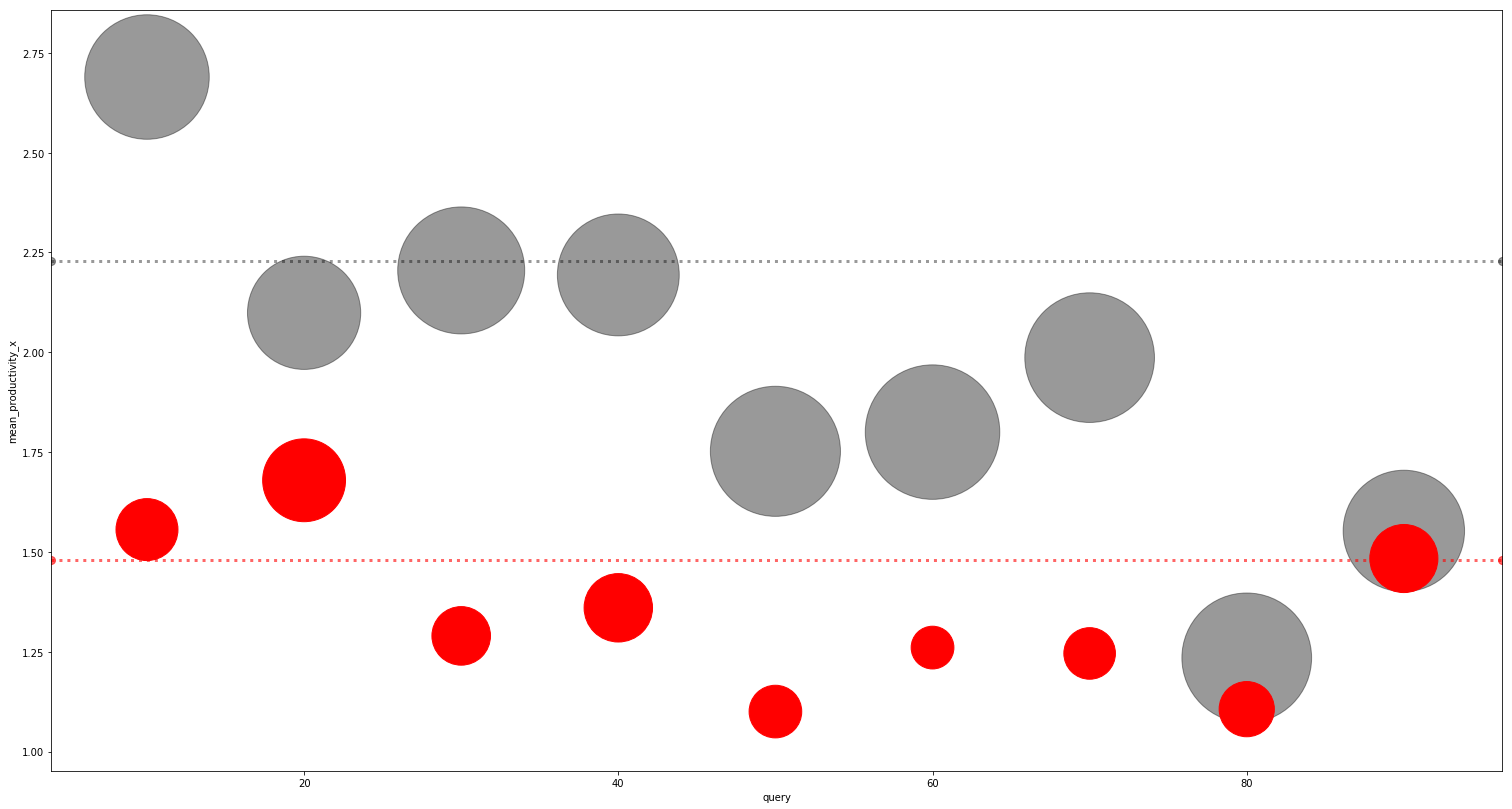

In [93]:
ax = df.plot(kind='scatter',x='query',y='mean_productivity_y',s=df.neutral*200,figsize=(26,14),color='black',alpha=0.4)
ax = df.plot(kind='scatter',x='query',y='mean_productivity_x',s=df.negative*200,figsize=(26,14),color='#FF0000',alpha=1,ax=ax)
ax_neu_avg = plt.axhline(y=neu_avg, color='black', marker='o', markersize=8, linewidth=3, linestyle=':',alpha =0.4, label = 'average neutral productivity')
ax_neg_avg = plt.axhline(y=neg_avg, color='#FF0000', marker='o', markersize=8, linewidth=3, linestyle=':',alpha =0.6, label = 'average negative productivity')



# 2. Users' mean productivity & sentiment analysis 

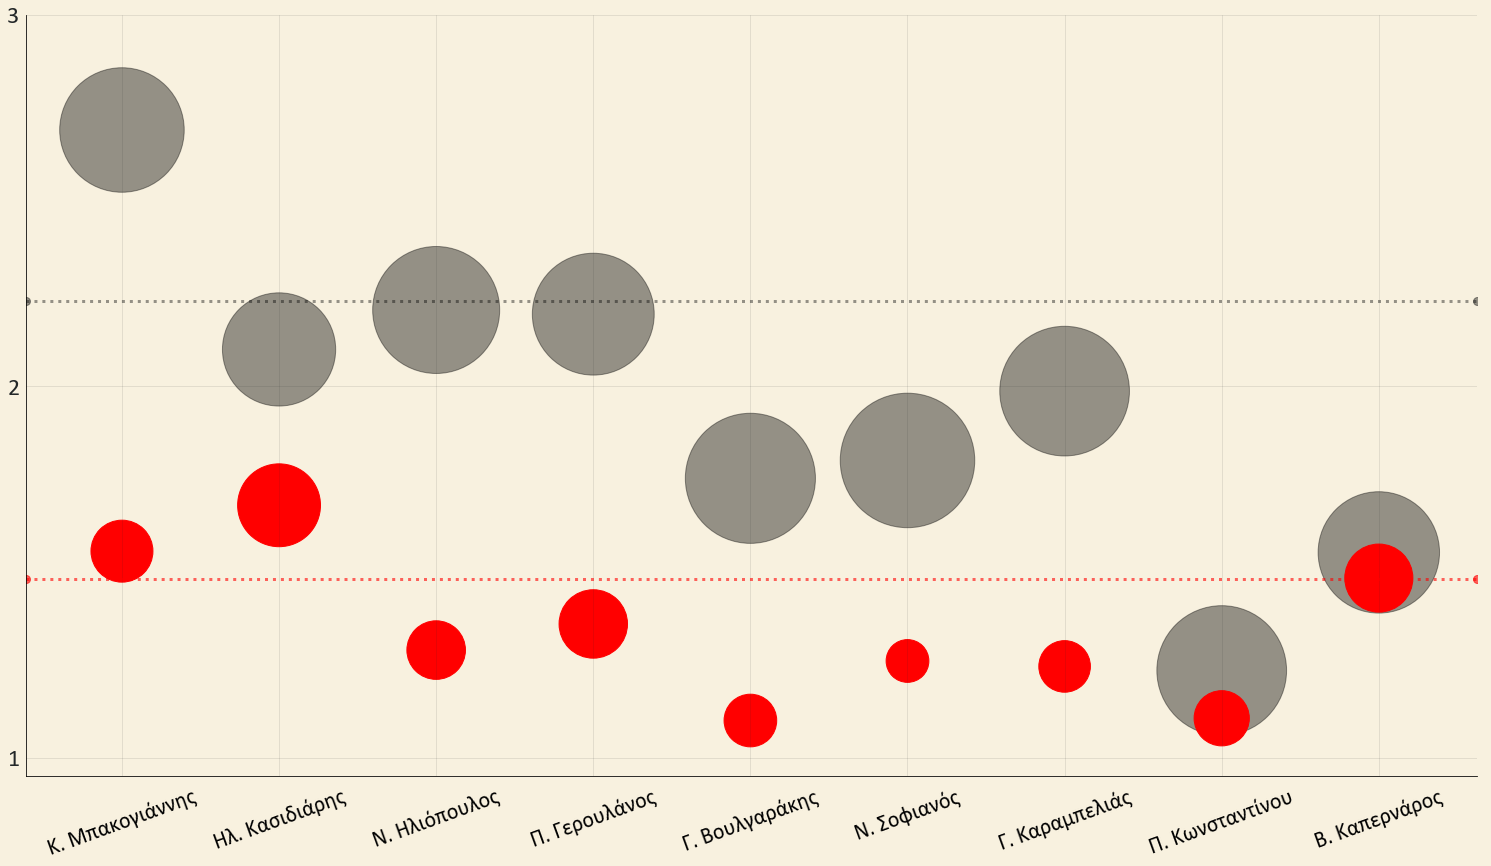

In [94]:
plt.rcParams.update({
    'axes.facecolor': '#F8F1DF',
    'savefig.facecolor': '#F8F1DF',
    'figure.facecolor': '#F8F1DF',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid':True,
    'grid.color':'#232728',
    'grid.linewidth':0.5,
   'grid.alpha':0.2,
    'xtick.top': False,
    'xtick.bottom': False,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    'ytick.left': True,
    #'ytick.color': 'black'
    'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': '22',
    'ytick.labelsize': '24',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Calibri',
    'font.size':26,
  #  'text.color':'#232728',
     })


ax = df.plot(kind='scatter',x='query',y='mean_productivity_y',s=df.neutral*200,figsize=(26,14),color='black',alpha=0.4)
ax = df.plot(kind='scatter',x='query',y='mean_productivity_x',s=df.negative*200,figsize=(26,14),color='#FF0000',alpha=1,ax=ax)
ax_neu_avg = plt.axhline(y=neu_avg, color='black', marker='o', markersize=8, linewidth=3, linestyle=':',alpha =0.4, label = 'average neutral productivity')
ax_neg_avg = plt.axhline(y=neg_avg, color='#FF0000', marker='o', markersize=8, linewidth=3, linestyle=':',alpha =0.6, label = 'average negative productivity')


ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
ax.set_yticks([1,2,3])
ax.set_yticklabels(['1','2','3'],color='#232728')
ax.set_xticks([10,20,30,40,50,60,70,80,90])
ax.set_xticklabels(['K. Mπακογιάννης','Ηλ. Κασιδιάρης','Ν. Ηλιόπουλος','Π. Γερουλάνος','Γ. Βουλγαράκης','Ν. Σοφιανός','Γ. Καραμπελιάς','Π. Κωνσταντίνου','Β. Καπερνάρος'],color='black',rotation=20)

# plt.savefig("topics_buzz_n.pdf")
plt.savefig("mayors.png")
plt.show()

In [95]:
neutral.groupby('query').channel.value_counts(normalize=True)*100

query                channel  
Βασίλης Καπερνάρος   twitter      62.544170
                     news         21.554770
                     facebook      7.773852
                     blogs         7.420495
                     youtube       0.706714
Γιώργος Βουλγαράκης  news         40.232313
                     twitter      33.685322
                     facebook     12.460401
                     blogs        12.038015
                     youtube       1.055966
                     instagram     0.422386
                     forums        0.105597
Γιώργος Καραμπελιάς  twitter      50.111359
                     blogs        28.285078
                     news         13.808463
                     facebook      6.013363
                     youtube       1.336303
                     forums        0.445434
Ηλίας Κασιδιάρης     twitter      80.376099
                     news         10.979678
                     blogs         4.094631
                     facebook      4.094631
 

In [96]:
neutral.head(0)

,channel,item_type,id,createdAt,impact,info,text,snippet,url,manual_sentiment,predicted_sentiment,sentiment,query


In [97]:
news_neu = neutral[neutral.channel.str.contains("news", case=False, na=False)]

In [98]:
news_neu.head(0)

,channel,item_type,id,createdAt,impact,info,text,snippet,url,manual_sentiment,predicted_sentiment,sentiment,query


In [99]:
news_neu_mpako = pd.DataFrame(data=news_neu.groupby('query').info.describe())
news_neu_mpako

,count,unique,top,freq
query,,,,
Βασίλης Καπερνάρος,61,47,http://www.enikos.gr,5
Γιώργος Βουλγαράκης,381,184,http://www.iapopsi.gr,24
Γιώργος Καραμπελιάς,62,44,http://www.paron.gr,4
Ηλίας Κασιδιάρης,362,181,http://www.newsnowgr.com,11
Κώστας Μπακογιάννης,2204,367,http://www.parapolitika.gr,47
Νάσος Ηλιόπουλος,1106,309,http://www.avgi.gr,38
Νίκος Σοφιανός,369,178,http://www.902.gr,41
Πέτρος Κωνσταντίνου,116,86,http://www.thepressproject.gr,4
Παύλος Γερουλάνος,737,236,http://www.polispress.gr,34


In [100]:
(367/news_neu_mpako['unique'].sum())*100

22.487745098039216

In [101]:
news_neu_mpako['mean_productivity'] = news_neu_mpako['count']/news_neu_mpako['unique']

In [102]:
news_neu_mpako

,count,unique,top,freq,mean_productivity
query,,,,,
Βασίλης Καπερνάρος,61,47,http://www.enikos.gr,5,1.29787
Γιώργος Βουλγαράκης,381,184,http://www.iapopsi.gr,24,2.07065
Γιώργος Καραμπελιάς,62,44,http://www.paron.gr,4,1.40909
Ηλίας Κασιδιάρης,362,181,http://www.newsnowgr.com,11,2
Κώστας Μπακογιάννης,2204,367,http://www.parapolitika.gr,47,6.00545
Νάσος Ηλιόπουλος,1106,309,http://www.avgi.gr,38,3.57929
Νίκος Σοφιανός,369,178,http://www.902.gr,41,2.07303
Πέτρος Κωνσταντίνου,116,86,http://www.thepressproject.gr,4,1.34884
Παύλος Γερουλάνος,737,236,http://www.polispress.gr,34,3.12288


In [103]:
news_neu_mpako = news_neu_mpako.sort_values(by='mean_productivity')
news_neu_mpako

,count,unique,top,freq,mean_productivity
query,,,,,
Βασίλης Καπερνάρος,61,47,http://www.enikos.gr,5,1.29787
Πέτρος Κωνσταντίνου,116,86,http://www.thepressproject.gr,4,1.34884
Γιώργος Καραμπελιάς,62,44,http://www.paron.gr,4,1.40909
Ηλίας Κασιδιάρης,362,181,http://www.newsnowgr.com,11,2
Γιώργος Βουλγαράκης,381,184,http://www.iapopsi.gr,24,2.07065
Νίκος Σοφιανός,369,178,http://www.902.gr,41,2.07303
Παύλος Γερουλάνος,737,236,http://www.polispress.gr,34,3.12288
Νάσος Ηλιόπουλος,1106,309,http://www.avgi.gr,38,3.57929
Κώστας Μπακογιάννης,2204,367,http://www.parapolitika.gr,47,6.00545


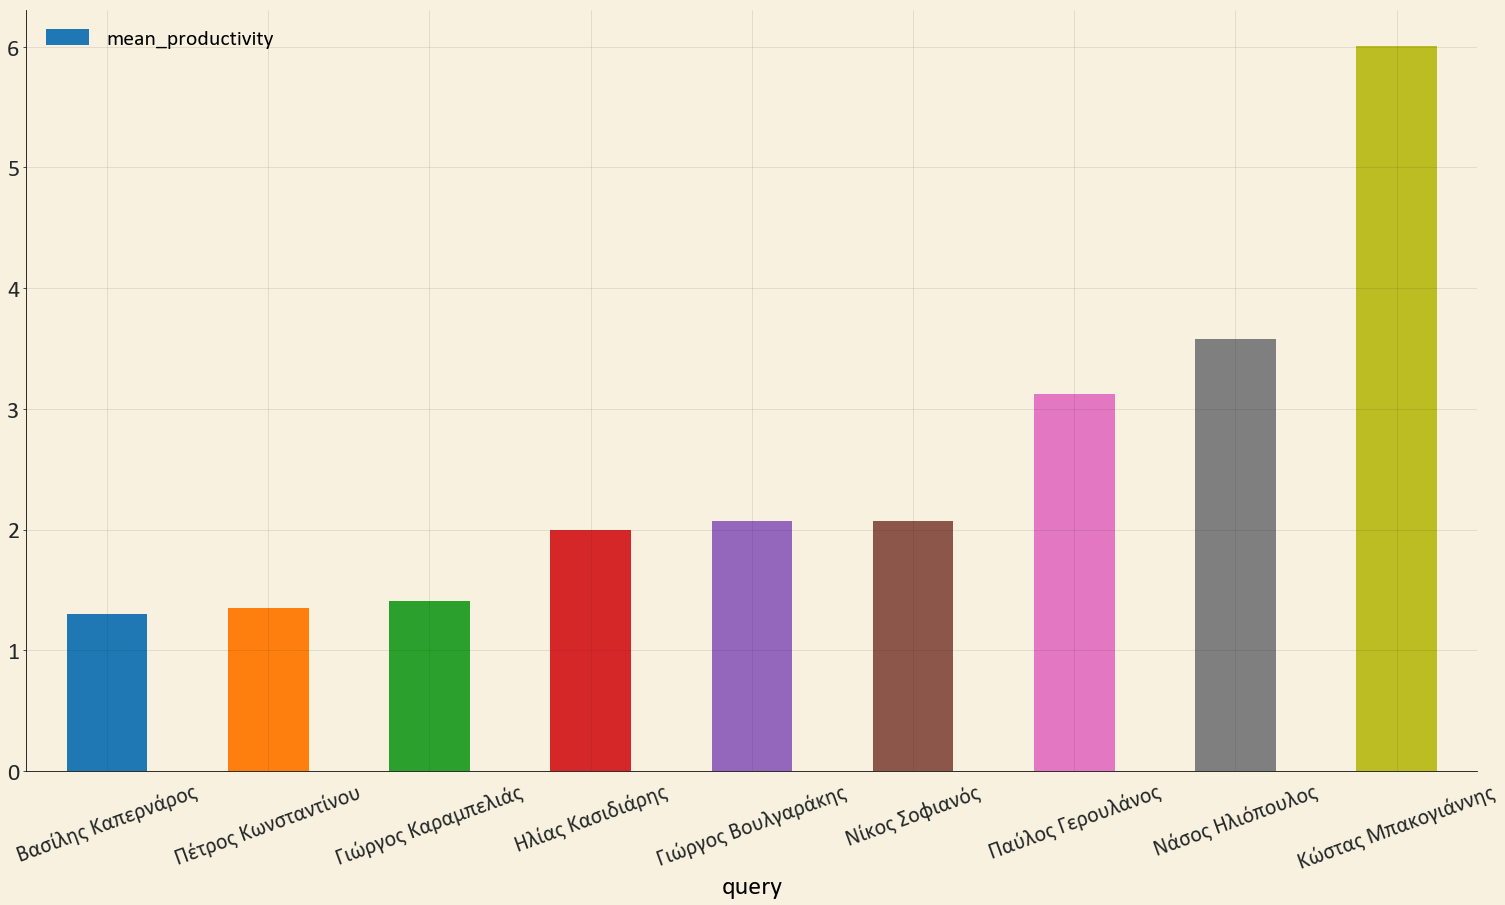

In [104]:
news_neu_mpako.plot(kind='bar',y='mean_productivity',figsize=(26,14),rot=20)

In [105]:
mpako = neutral[(neutral['query'].str.contains("Μπακογιάννης", case=False, na=False))]
#twitter_neu = neutral[neutral.channel.str.contains("twitter", case=False, na=False)]

In [106]:
mpako.groupby('channel').info.describe()

,count,freq,top,unique
channel,,,,
blogs,444,25,http://www.aftodioikisi.gr,176
facebook,713,36,250769401800339,475
forums,2,2,https://www.4troxoi.gr/phpBB3/,1
instagram,0,NaN,NaN,0
news,2204,47,http://www.parapolitika.gr,367
twitter,3922,49,@kanekos69,1696
youtube,6,1,vagoo *,6


In [107]:
mpako2 = pd.DataFrame(data=mpako.groupby('channel').info.describe())

In [108]:
mpako2['channel_share'] = (mpako2['count']/mpako2['count'].sum())*100

In [109]:
mpako2['channel_share_unique'] = (mpako2['unique']/mpako2['unique'].sum())*100

In [110]:
mpako2

,count,freq,top,unique,channel_share,channel_share_unique
channel,,,,,,
blogs,444,25,http://www.aftodioikisi.gr,176,6.0897,6.46821
facebook,713,36,250769401800339,475,9.77918,17.4568
forums,2,2,https://www.4troxoi.gr/phpBB3/,1,0.0274311,0.0367512
instagram,0,NaN,NaN,0,0,0
news,2204,47,http://www.parapolitika.gr,367,30.229,13.4877
twitter,3922,49,@kanekos69,1696,53.7923,62.33
youtube,6,1,vagoo *,6,0.0822932,0.220507


In [111]:
ntora = neutral[(neutral.text.str.contains("ντορα", case=False, na=False))|(neutral.text.str.contains("ντόρα", case=False, na=False))]

In [112]:
ntora.shape

(39, 13)

In [113]:
ntora.describe()

,impact
count,39.000000
mean,0.308974
std,0.268992
min,0.010000
25%,0.105000
50%,0.210000
75%,0.500000
max,0.920000


In [114]:
twitter_neu = neutral[neutral.channel.str.contains("twitter", case=False, na=False)]

In [115]:
twitter_neu_mpako = pd.DataFrame(data=twitter_neu.groupby('query').info.describe())
twitter_neu_mpako

,count,unique,top,freq
query,,,,
Βασίλης Καπερνάρος,177,98,@annika1021,25
Γιώργος Βουλγαράκης,319,176,@diotiskostas1,17
Γιώργος Καραμπελιάς,225,113,@blue_sevi,22
Ηλίας Κασιδιάρης,2650,1183,@1024102410,34
Κώστας Μπακογιάννης,3922,1696,@kanekos69,49
Νάσος Ηλιόπουλος,2152,1038,@InsdataInter,109
Νίκος Σοφιανός,395,206,@stathisdrogosis,17
Πέτρος Κωνσταντίνου,205,184,@StraightSix6,5
Παύλος Γερουλάνος,1265,620,@v_mary_p,50


In [116]:
twitter_neu_mpako['sov_unique'] = (twitter_neu_mpako['unique']/twitter_neu_mpako['unique'].sum())*100

In [117]:
twitter_neu_mpako

,count,unique,top,freq,sov_unique
query,,,,,
Βασίλης Καπερνάρος,177,98,@annika1021,25,1.84419
Γιώργος Βουλγαράκης,319,176,@diotiskostas1,17,3.31201
Γιώργος Καραμπελιάς,225,113,@blue_sevi,22,2.12646
Ηλίας Κασιδιάρης,2650,1183,@1024102410,34,22.2619
Κώστας Μπακογιάννης,3922,1696,@kanekos69,49,31.9157
Νάσος Ηλιόπουλος,2152,1038,@InsdataInter,109,19.5333
Νίκος Σοφιανός,395,206,@stathisdrogosis,17,3.87655
Πέτρος Κωνσταντίνου,205,184,@StraightSix6,5,3.46255
Παύλος Γερουλάνος,1265,620,@v_mary_p,50,11.6673


In [118]:
twitter_neu_mpako['sov_unique'].sum()

100.0

In [119]:
twitter_neu_mpako['unique'].sum()

5314

In [120]:
twitter_neu_mpako['mean_productivity'] = twitter_neu_mpako['count']/twitter_neu_mpako['unique']

In [121]:
twitter_neu_mpako = twitter_neu_mpako.sort_values(by='mean_productivity')
twitter_neu_mpako

,count,unique,top,freq,sov_unique,mean_productivity
query,,,,,,
Πέτρος Κωνσταντίνου,205,184,@StraightSix6,5,3.46255,1.11413
Βασίλης Καπερνάρος,177,98,@annika1021,25,1.84419,1.80612
Γιώργος Βουλγαράκης,319,176,@diotiskostas1,17,3.31201,1.8125
Νίκος Σοφιανός,395,206,@stathisdrogosis,17,3.87655,1.91748
Γιώργος Καραμπελιάς,225,113,@blue_sevi,22,2.12646,1.99115
Παύλος Γερουλάνος,1265,620,@v_mary_p,50,11.6673,2.04032
Νάσος Ηλιόπουλος,2152,1038,@InsdataInter,109,19.5333,2.07322
Ηλίας Κασιδιάρης,2650,1183,@1024102410,34,22.2619,2.24007
Κώστας Μπακογιάννης,3922,1696,@kanekos69,49,31.9157,2.3125


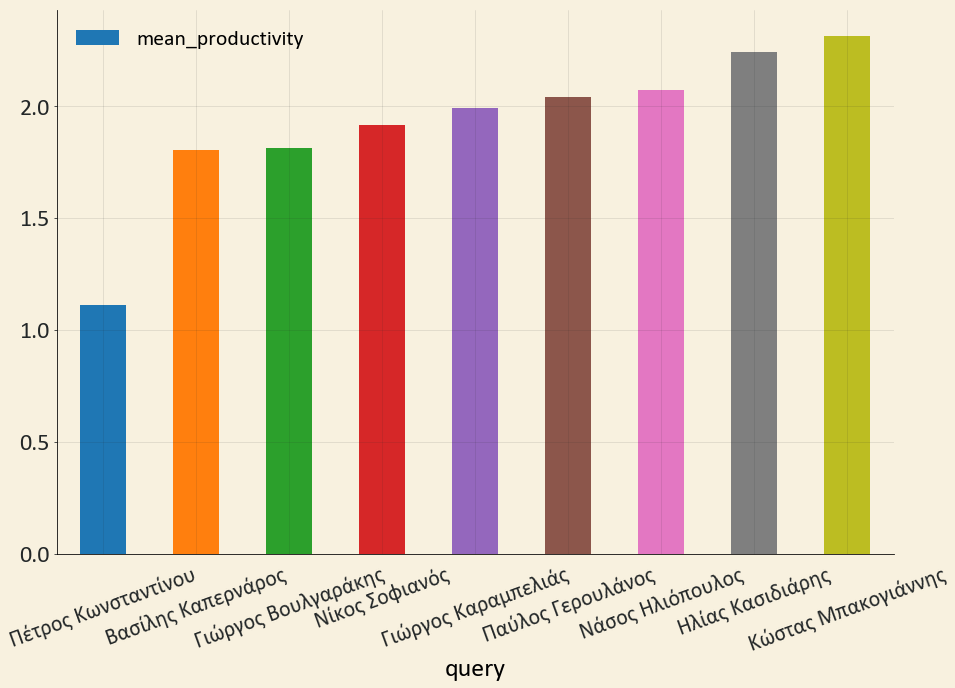

In [122]:
twitter_neu_mpako.plot(kind='bar',y='mean_productivity',figsize=(15,10),rot=20)